# Heart Disease Diagnostic Analysis

# Introduction:

In [1]:
# This project focuses on analyzing heart disease data using Python for visualization and SQL for querying.
# Heart disease risk factors like age, cholesterol, and blood pressure are explored through data-driven methods.
# SQL queries efficiently retrieve insights, while Python visualizations provide clear, actionable patterns.
# The analysis aims to identify trends and relationships within heart disease data for early diagnosis.
# Python and SQL tools empower the project to deliver meaningful health insights and recommendations.

# Importing Libraries:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "1012",
                             database = "heart")
cur = db.cursor() 

# Importing Dataset:

In [3]:
data = pd.read_csv("C:/Users/ASUS/Desktop/Power BI Practice/Heart Disease.csv")
data.head(10)
# After Cleaning in SQL

,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugar,RestingECGResults,MaxHeartRateAchieved,ExerciseInducedAngina,Oldpeak,SlopeOfPeakExerciseSTSegment,MajorVessels,ThalassemiaStatus,HeartDiseaseStatus
0,52,Female,Angina,125,212,Normal,Abnormal,168,No,1.0,Pathological,50% to 75% Blockage,Reversable defect,Normal
1,53,Female,Angina,140,203,High,Normal,155,Yes,3.1,Upsloping,No Blockage,Reversable defect,Normal
2,70,Female,Angina,145,174,Normal,Abnormal,125,Yes,2.6,Upsloping,No Blockage,Reversable defect,Normal
3,61,Female,Angina,148,203,Normal,Abnormal,161,No,0.0,Pathological,Less than 50% Blockage,Reversable defect,Normal
4,62,Male,Angina,138,294,High,Abnormal,106,No,1.9,Downsloping,More than 75% Blockage,Fixed defect,Normal
5,58,Male,Angina,100,248,Normal,Normal,122,No,1.0,Downsloping,No Blockage,Fixed defect,Evidence
6,58,Female,Angina,114,318,Normal,Probable,140,No,4.4,Upsloping,More than 75% Blockage,Normal,Normal
7,55,Female,Angina,160,289,Normal,Normal,145,Yes,0.8,Downsloping,Less than 50% Blockage,Reversable defect,Normal
8,46,Female,Angina,120,249,Normal,Normal,144,No,0.8,Pathological,No Blockage,Reversable defect,Normal
9,54,Female,Angina,122,286,Normal,Normal,116,Yes,3.2,Downsloping,50% to 75% Blockage,Fixed defect,Normal


# About Dataset:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1025 non-null   int64  
 1   Sex                           1025 non-null   object 
 2   ChestPainType                 1025 non-null   object 
 3   RestingBloodPressure          1025 non-null   int64  
 4   SerumCholesterol              1025 non-null   int64  
 5   FastingBloodSugar             1025 non-null   object 
 6   RestingECGResults             1025 non-null   object 
 7   MaxHeartRateAchieved          1025 non-null   int64  
 8   ExerciseInducedAngina         1025 non-null   object 
 9   Oldpeak                       1025 non-null   float64
 10  SlopeOfPeakExerciseSTSegment  1025 non-null   object 
 11  MajorVessels                  1025 non-null   object 
 12  ThalassemiaStatus             1025 non-null   object 
 13  Hea

# Distribution of Heart Disease by Age Group.

In [6]:
query = """SELECT 
    CASE
        WHEN Age BETWEEN 20 AND 30 THEN '20-30'
        WHEN Age BETWEEN 31 AND 40 THEN '30-40'
        WHEN Age BETWEEN 41 AND 50 THEN '40-50'
        WHEN Age BETWEEN 51 AND 60 THEN '50-60'
        WHEN Age > 60 THEN 'Above 60'
    END AS AgeGroup,
    COUNT(*) AS PatientCount,
    SUM(CASE
        WHEN HeartDiseaseStatus = 'Evidence' THEN 1
        ELSE 0
    END) AS 'Heart Disease Count',
    ROUND(AVG(CASE
                WHEN HeartDiseaseStatus = 'Evidence' THEN 1.0
                ELSE 0
            END) * 100,
            2) AS 'Heart Disease Percentage'
FROM
    heart.`heart disease`
GROUP BY AgeGroup
ORDER BY AgeGroup"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Age Group","Patient Count","Heart Disease Count","Heart Disease Percent"])
df

,Age Group,Patient Count,Heart Disease Count,Heart Disease Percent
0,20-30,4,4,100.00
1,30-40,64,41,64.06
2,40-50,247,166,67.21
3,50-60,438,204,46.58
4,Above 60,272,111,40.81


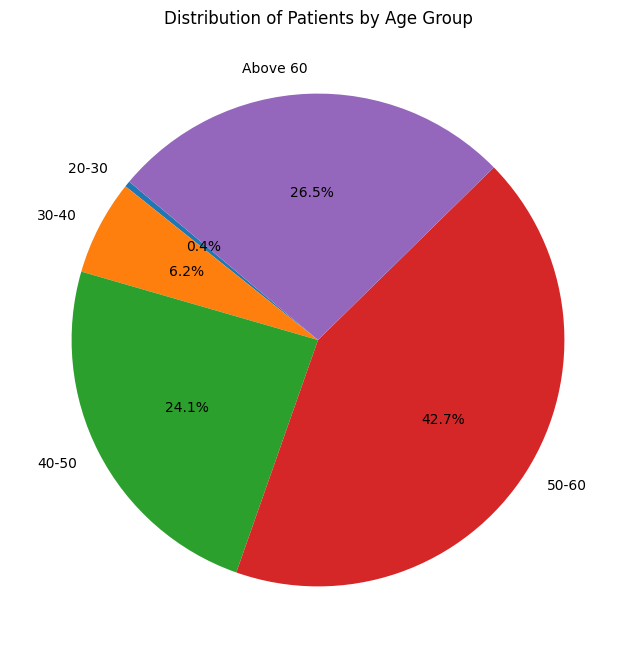

In [7]:
plt.figure(figsize=(8, 8))
plt.pie(df['Patient Count'], labels=df['Age Group'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Patients by Age Group')
plt.show()

# Heart Disease Frequency by Gender and Chest Pain Type.

In [8]:
query = """SELECT 
    Sex,
    ChestPainType,
    COUNT(*) AS TotalPatient,
    SUM(CASE
        WHEN HeartDiseaseStatus = 'Evidence' THEN 1
        ELSE 0
    END) AS HeartDiseaseCount,
    ROUND(AVG(CASE
                WHEN HeartDiseaseStatus = 'Evidence' THEN 1.0
                ELSE 0
            END) * 100,
            2) AS HeartDiseasePercentage
FROM
    heart.`heart disease`
GROUP BY Sex , ChestPainType
ORDER BY Sex , ChestPainType;"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Sex","Chest Pain Type","Total Patient","Heart Disease Count","Heart Disease Percent"])
df

,Sex,Chest Pain Type,Total Patient,Heart Disease Count,Heart Disease Percent
0,Female,Angina,364,64,17.58
1,Female,Costochondritis,64,38,59.38
2,Female,GERD,175,114,65.14
3,Female,Heart Attack,110,84,76.36
4,Male,Angina,133,58,43.61
5,Male,Costochondritis,13,13,100.00
6,Male,GERD,109,105,96.33
7,Male,Heart Attack,57,50,87.72


<Figure size 800x400 with 0 Axes>

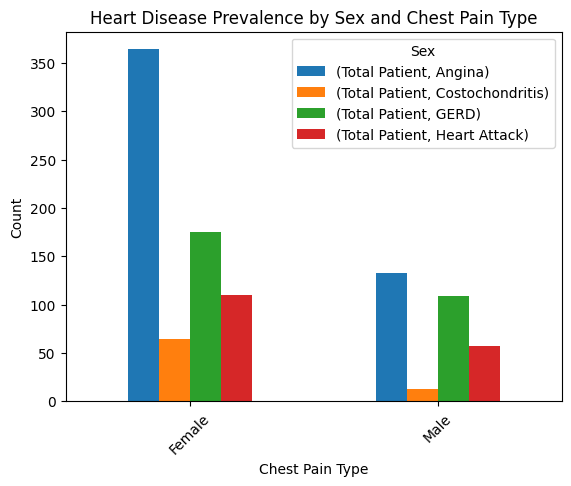

<Figure size 800x400 with 0 Axes>

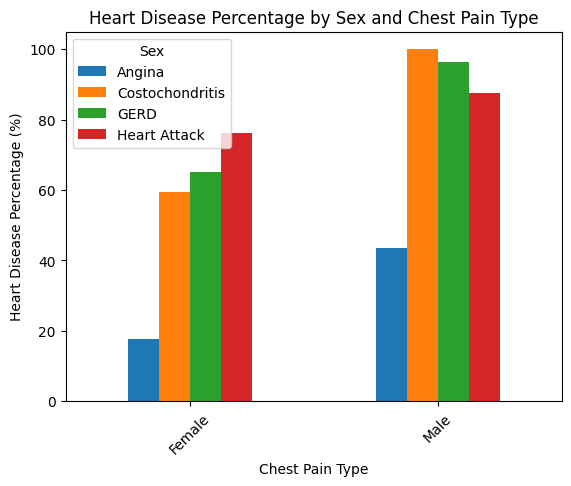

In [9]:
plt.figure(figsize=(8, 4))
df.groupby(['Sex', 'Chest Pain Type']).sum().unstack().plot(kind='bar')
plt.title('Heart Disease Prevalence by Sex and Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.xticks(rotation=45)
plt.show()

df['Total Patients'] = df.groupby(['Sex', 'Chest Pain Type'])['Sex'].transform('size')
pivot_df = df.pivot_table(index='Sex', columns='Chest Pain Type', values='Heart Disease Percent')
plt.figure(figsize=(8, 4))
pivot_df.plot(kind='bar')
plt.title('Heart Disease Percentage by Sex and Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Heart Disease Percentage (%)')
plt.legend(title='Sex')
plt.xticks(rotation=45)
plt.show()

# Average Max Heart Rate Achieved and Serum Cholesterol by Heart Disease Status.

In [10]:
query = """SELECT 
    HeartDiseaseStatus,
    AVG(MaxHeartRateAchieved) AS AvgMaxHeartRate,
    AVG(SerumCholesterol) AS AvgSerumCholesterol
FROM
    heart.`heart disease`
GROUP BY HeartDiseaseStatus"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Heart Disease Status","Avg of Max Heart Rate","Avg of Serum Cholesterol"])
df

,Heart Disease Status,Avg of Max Heart Rate,Avg of Serum Cholesterol
0,Normal,139.1303,251.2926
1,Evidence,158.5856,240.9791


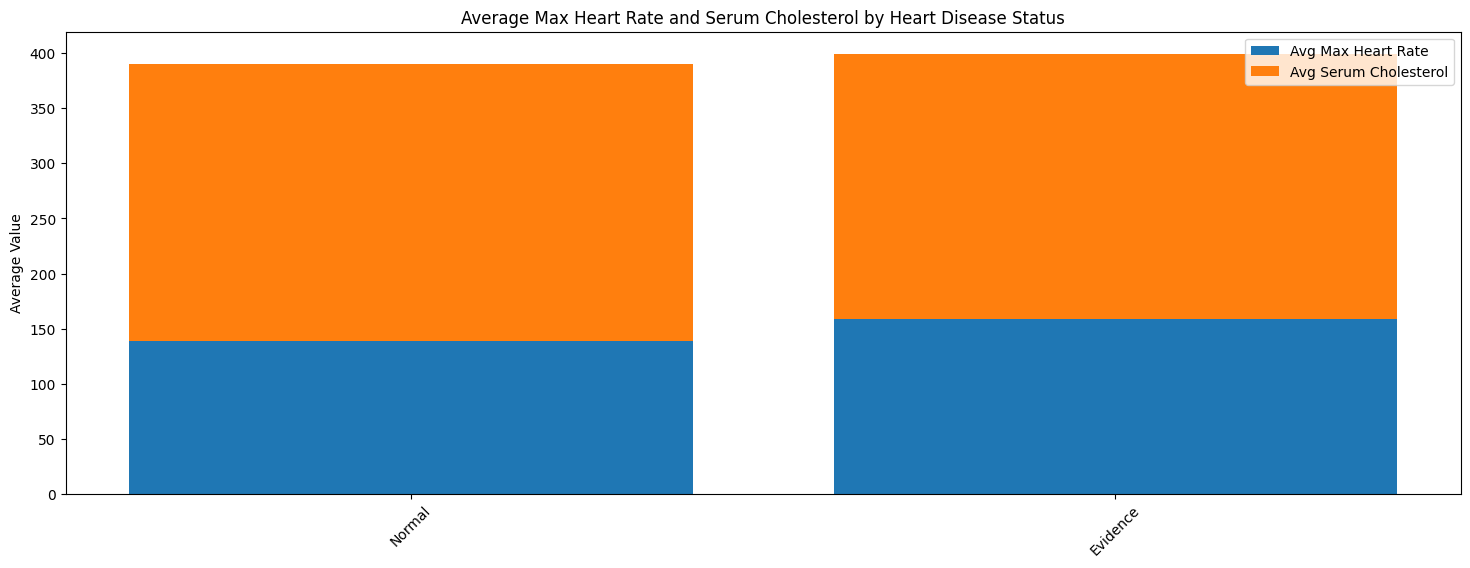

In [11]:
plt.figure(figsize=(18, 6))
x = df['Heart Disease Status']
y1 = df['Avg of Max Heart Rate']
y2 = df['Avg of Serum Cholesterol']
plt.bar(x, y1, label='Avg Max Heart Rate')
plt.bar(x, y2, label='Avg Serum Cholesterol', bottom=y1) 
plt.title('Average Max Heart Rate and Serum Cholesterol by Heart Disease Status')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend() 
plt.show()

# Correlation Between Resting Blood Pressure and Age for Patients with Heart Disease.

In [12]:
query = """SELECT 
    Age,
    RestingBloodPressure
FROM heart.`heart disease`
WHERE HeartDiseaseStatus = 'Evidence'
ORDER BY Age"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Age","Resting Blood Pressure"])
df

,Age,Resting Blood Pressure
0,29,130
1,29,130
2,29,130
3,29,130
4,34,118
...,...,...
521,74,120
522,74,120
523,76,140
524,76,140


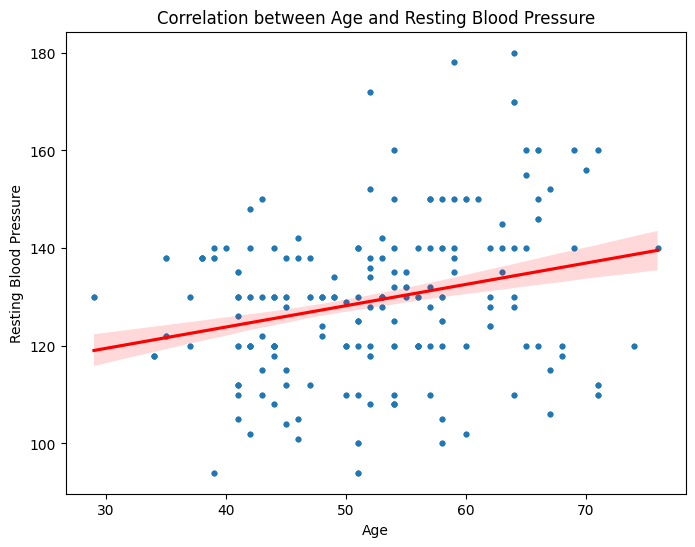

In [13]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='Resting Blood Pressure', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Correlation between Age and Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.show()

# Distribution of Heart Disease by Major Vessels and Thalassemia Status.

In [14]:
query = """SELECT 
    MajorVessels,
    ThalassemiaStatus,
    COUNT(*) AS TotalPatients,
    SUM(CASE
        WHEN HeartDiseaseStatus = 'Evidence' THEN 1
        ELSE 0
    END) AS HeartDiseaseCount,
    ROUND(AVG(CASE
                WHEN HeartDiseaseStatus = 'Evidence' THEN 1.0
                ELSE 0
            END) * 100,
            2) AS HeartDiseasePercentage
FROM
    heart.`heart disease`
GROUP BY MajorVessels , ThalassemiaStatus
ORDER BY MajorVessels , ThalassemiaStatus"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Major Vessels","Thalassemia Status","Total Patient","Heart Disease Count","Heart Disease Percentage"])
df

,Major Vessels,Thalassemia Status,Total Patient,Heart Disease Count,Heart Disease Percentage
0,50% to 75% Blockage,Fixed defect,48,21,43.75
1,50% to 75% Blockage,Normal,13,0,0.00
2,50% to 75% Blockage,Reversable defect,73,0,0.00
3,Complete Blockage,Fixed defect,11,11,100.00
4,Complete Blockage,Reversable defect,7,4,57.14
5,Less than 50% Blockage,Fixed defect,98,53,54.08
6,Less than 50% Blockage,Normal,15,0,0.00
7,Less than 50% Blockage,Reversable defect,113,13,11.50
8,More than 75% Blockage,Fixed defect,21,3,14.29
9,More than 75% Blockage,Normal,7,0,0.00


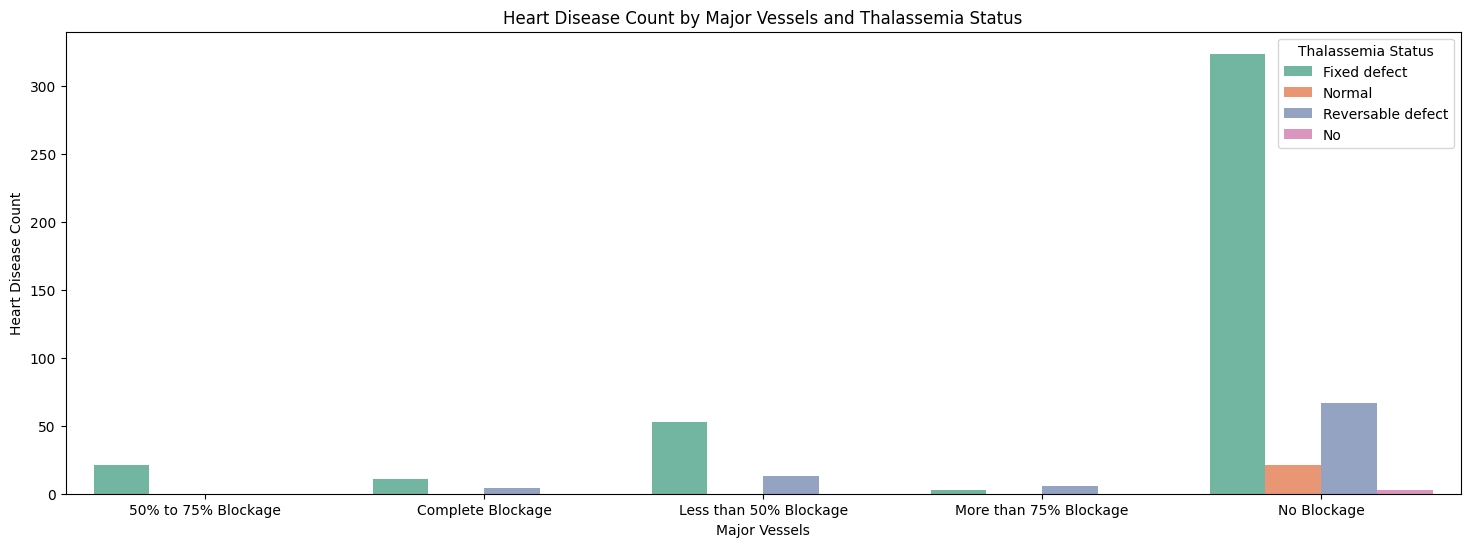

In [15]:
plt.figure(figsize=(18, 6))
sns.barplot(x='Major Vessels', y='Heart Disease Count', hue='Thalassemia Status', data=df, palette='Set2')

plt.title('Heart Disease Count by Major Vessels and Thalassemia Status')
plt.xlabel('Major Vessels')
plt.ylabel('Heart Disease Count')
plt.legend(title='Thalassemia Status')
plt.show()

# Effect of Fasting Blood Sugar on Heart Disease.

In [16]:
query = """SELECT 
    FastingBloodSugar,
    COUNT(*) AS TotalPatients,
    SUM(CASE
        WHEN HeartDiseaseStatus = 'Evidence' THEN 1
        ELSE 0
    END) AS HeartDiseaseCount,
    ROUND(AVG(CASE
                WHEN HeartDiseaseStatus = 'Evidence' THEN 1.0
                ELSE 0
            END) * 100,
            2) AS HeartDiseasePercentage
FROM
    heart.`heart disease`
GROUP BY FastingBloodSugar"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Fasting Blood Sugar","Total Patient","Heart Disease Count","Heart Disease Percentage"])
df

,Fasting Blood Sugar,Total Patient,Heart Disease Count,Heart Disease Percentage
0,Normal,872,455,52.18
1,High,153,71,46.41


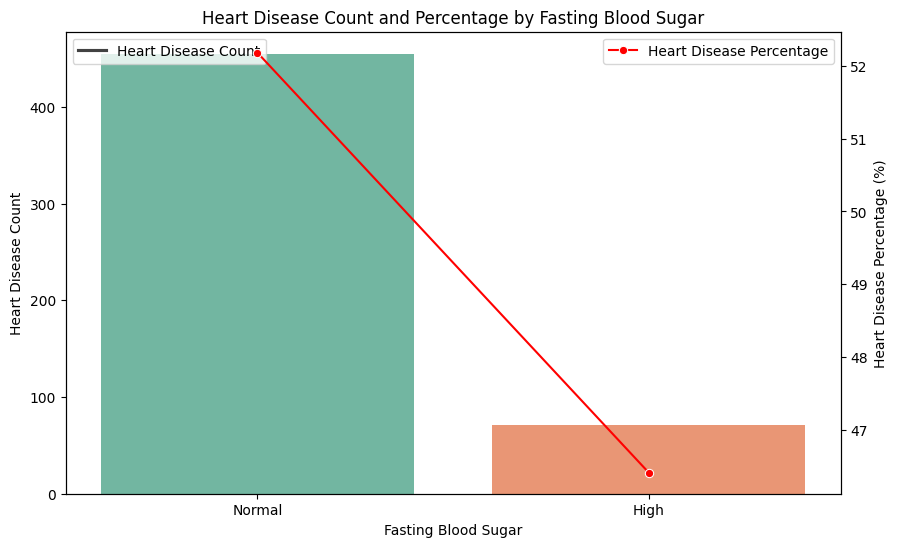

In [17]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x='Fasting Blood Sugar', y='Heart Disease Count',hue='Fasting Blood Sugar', data=df, palette='Set2', ax=ax1)
ax1.set_ylabel('Heart Disease Count')
ax1.set_title('Heart Disease Count and Percentage by Fasting Blood Sugar')
ax2 = ax1.twinx()
sns.lineplot(x='Fasting Blood Sugar', y='Heart Disease Percentage', data=df, color='r', marker='o', ax=ax2)
ax2.set_ylabel('Heart Disease Percentage (%)')
ax1.legend(['Heart Disease Count'], loc='upper left')
ax2.legend(['Heart Disease Percentage'], loc='upper right')
plt.show()

# Slope of Peak Exercise ST Segment and Its Impact on Heart Disease.

In [18]:
query = """SELECT 
    SlopeOfPeakExerciseSTSegment,
    ROUND(AVG(Oldpeak), 3) AS Avg_Oldpeak,
    ROUND(AVG(CASE
                WHEN HeartDiseaseStatus = 'Evidence' THEN 1
                ELSE 0
            END) * 100,
            3) AS HeartDisease_Percentage
FROM
    heart.`heart disease`
GROUP BY SlopeOfPeakExerciseSTSegment
ORDER BY HeartDisease_Percentage DESC"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Slope Of Peak Exercise ST Segment","AVG Old Peak","Heart Disease Percentage"])
df

,Slope Of Peak Exercise ST Segment,AVG Old Peak,Heart Disease Percentage
0,Pathological,0.421,72.495
1,Upsloping,2.728,37.838
2,Downsloping,1.450,32.780


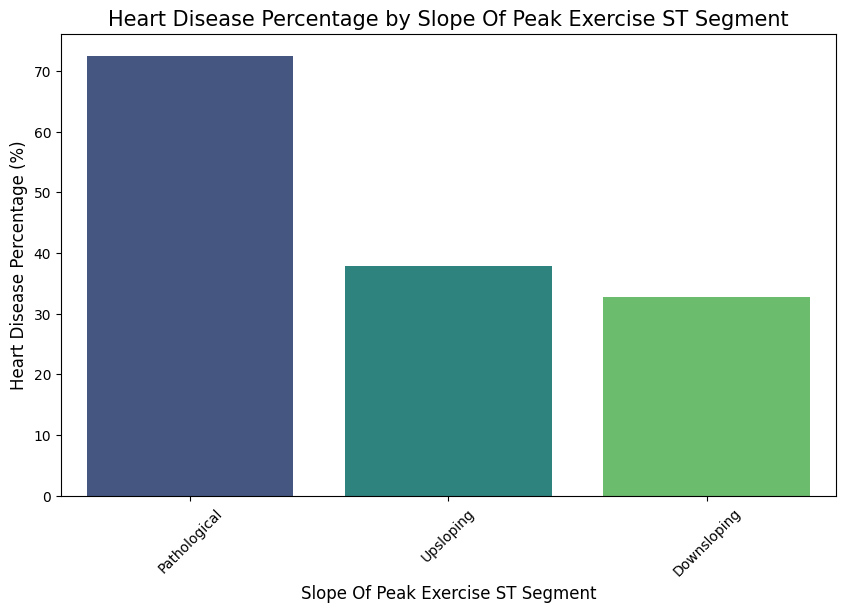

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Slope Of Peak Exercise ST Segment',
    y='Heart Disease Percentage', hue='Slope Of Peak Exercise ST Segment', data=df,
    palette='viridis')
plt.xlabel('Slope Of Peak Exercise ST Segment', fontsize=12)
plt.ylabel('Heart Disease Percentage (%)', fontsize=12)
plt.title('Heart Disease Percentage by Slope Of Peak Exercise ST Segment', fontsize=15)
plt.xticks(rotation=45)
plt.show()

# Analysis of Thalassemia Status and Its Relationship to Heart Disease.

In [20]:
query = """SELECT
    ThalassemiaStatus,
    COUNT(CASE WHEN HeartDiseaseStatus = 'Evidence' THEN 1 ELSE NULL END) AS HeartDisease_Count,
    COUNT(CASE WHEN HeartDiseaseStatus = 'Normal' THEN 1 ELSE NULL END) AS NoHeartDisease_Count,
    AVG(Age) AS Avg_Age,
    AVG(RestingBloodPressure) AS Avg_RestingBloodPressure,
    AVG(SerumCholesterol) AS Avg_SerumCholesterol
FROM
    heart.`heart disease`
GROUP BY
    ThalassemiaStatus
ORDER BY
    HeartDisease_Count DESC"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Thalassemia Status","Heart Disease Count","No Heart Disease Count",
                                   "Avg_Age","Avg Resting BP","Avg Serum Cholesterol"])
df

,Thalassemia Status,Heart Disease Count,No Heart Disease Count,Avg_Age,Avg Resting BP,Avg Serum Cholesterol
0,Fixed defect,412,132,53.3438,129.3217,245.3952
1,Reversable defect,90,320,55.6488,133.9049,250.0951
2,Normal,21,43,56.1406,136.7813,228.9375
3,No,3,4,52.4286,128.0000,209.1429


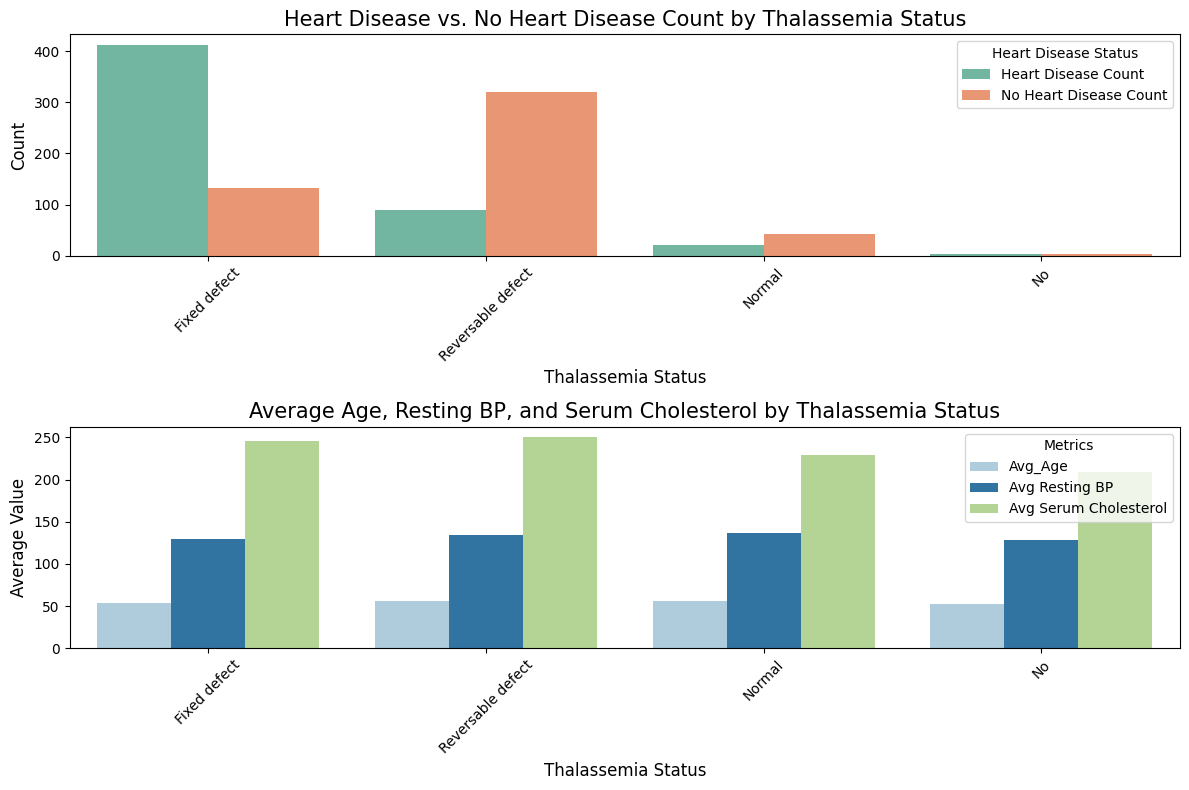

In [21]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
df_melted_counts = df.melt(id_vars='Thalassemia Status', value_vars=['Heart Disease Count', 'No Heart Disease Count'], 
                           var_name='Heart Disease Status', value_name='Count')
sns.barplot(
    x='Thalassemia Status',
    y='Count',
    hue='Heart Disease Status',
    data=df_melted_counts,
    palette='Set2')
plt.xlabel('Thalassemia Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Heart Disease vs. No Heart Disease Count by Thalassemia Status', fontsize=15)
plt.xticks(rotation=45)
plt.legend(title='Heart Disease Status')
plt.subplot(2, 1, 2)
df_melted_avgs = df.melt(id_vars='Thalassemia Status', value_vars=['Avg_Age', 'Avg Resting BP', 'Avg Serum Cholesterol'], 
                         var_name='Metrics', value_name='Average')
sns.barplot(
    x='Thalassemia Status',
    y='Average',
    hue='Metrics',
    data=df_melted_avgs,
    palette='Paired')
plt.xlabel('Thalassemia Status', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.title('Average Age, Resting BP, and Serum Cholesterol by Thalassemia Status', fontsize=15)
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

# Max Heart Rate Achieved by Chest Pain Type and Heart Disease Status.

In [22]:
query = """SELECT
    ChestPainType,
    HeartDiseaseStatus,
    AVG(MaxHeartRateAchieved) AS Avg_MaxHeartRateAchieved,
    MIN(MaxHeartRateAchieved) AS Min_MaxHeartRateAchieved,
    MAX(MaxHeartRateAchieved) AS Max_MaxHeartRateAchieved
FROM
    heart.`heart disease`
GROUP BY
    ChestPainType, HeartDiseaseStatus
ORDER BY
    ChestPainType, HeartDiseaseStatus"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Chest Pain Type","Heart Disease Status","Avg Max HR Achieved",
                                   "Min Max HR Achieved","Max Max HR Achieved"])
df

,Chest Pain Type,Heart Disease Status,Avg Max HR Achieved,Min Max HR Achieved,Max Max HR Achieved
0,Angina,Evidence,152.2951,105,186
1,Angina,Normal,136.0693,71,181
2,Costochondritis,Evidence,157.6471,114,190
3,Costochondritis,Normal,156.1154,125,182
4,GERD,Evidence,158.5890,96,194
5,GERD,Normal,143.4154,97,173
6,Heart Attack,Evidence,164.6642,121,202
7,Heart Attack,Normal,152.0909,103,195


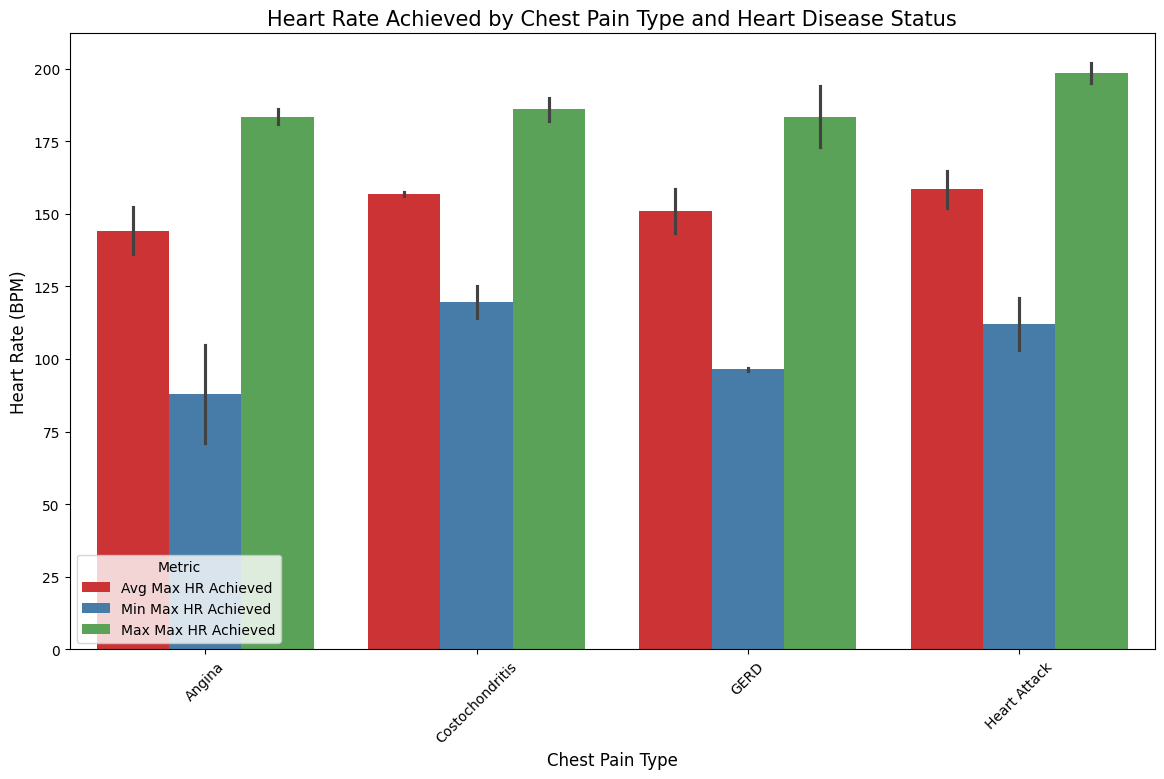

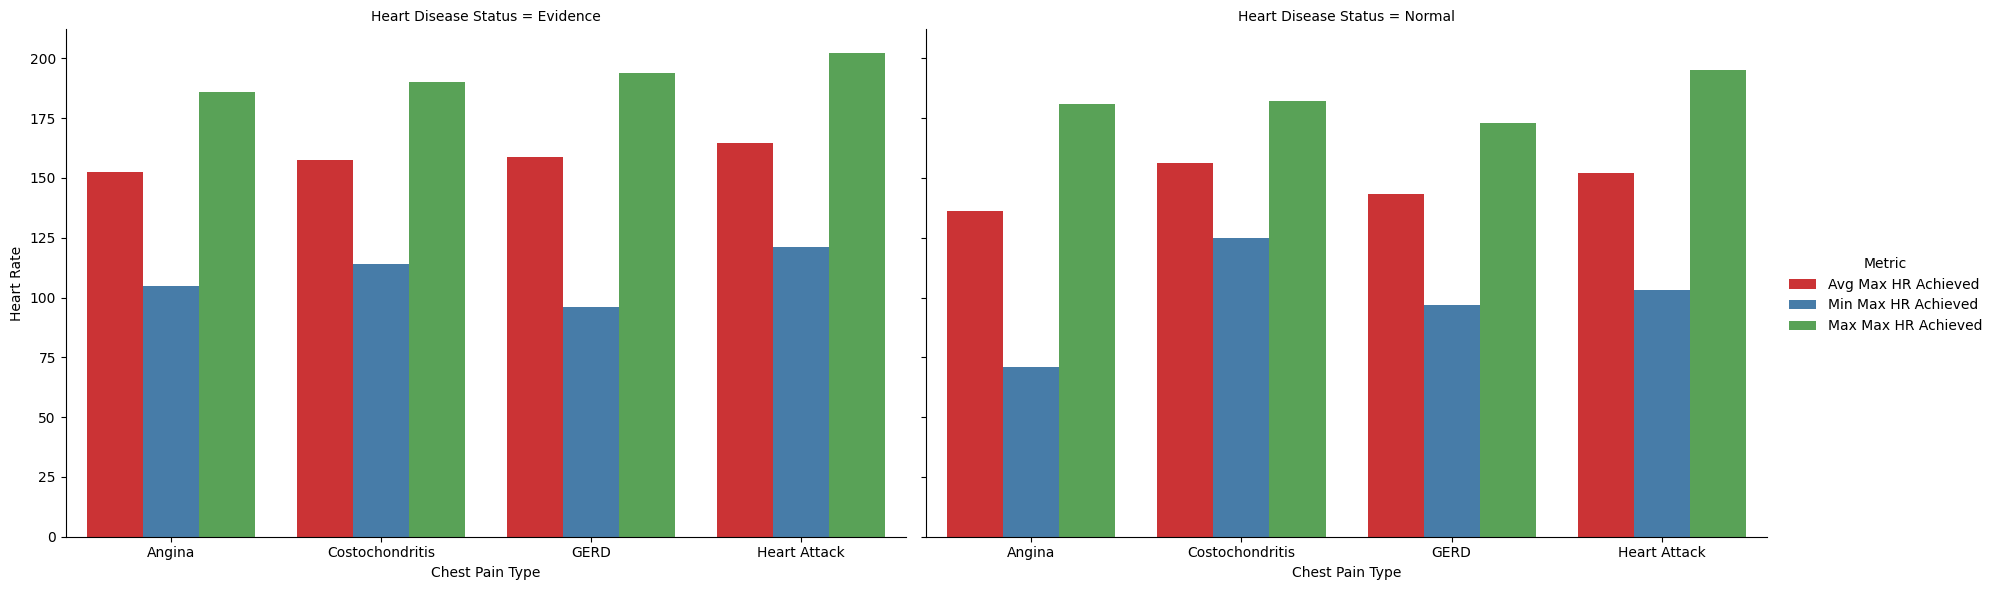

In [23]:
plt.figure(figsize=(14, 8))
df_melted = df.melt(id_vars=["Chest Pain Type", "Heart Disease Status"],
                    value_vars=["Avg Max HR Achieved", "Min Max HR Achieved", "Max Max HR Achieved"],
                    var_name="Metric", value_name="Heart Rate")
hue_order = ["Avg Max HR Achieved", "Min Max HR Achieved", "Max Max HR Achieved"]
sns.barplot(
    x="Chest Pain Type",
    y="Heart Rate",
    hue="Metric",
    data=df_melted,
    palette="Set1",
    hue_order=hue_order)
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Heart Rate (BPM)', fontsize=12)
plt.title('Heart Rate Achieved by Chest Pain Type and Heart Disease Status', fontsize=15)
plt.legend(title='Metric')
plt.xticks(rotation=45)
g = sns.FacetGrid(df_melted, col="Heart Disease Status", height=6, aspect=1.5, sharey=True)
g.map_dataframe(sns.barplot, x="Chest Pain Type", y="Heart Rate", hue="Metric", hue_order=hue_order, palette="Set1")
g.add_legend(title="Metric")
plt.show()

# Average Resting Blood Pressure by Age Group and Heart Disease Status.

In [24]:
query = """SELECT
    CASE
        WHEN Age < 30 THEN 'Under 30'
        WHEN Age BETWEEN 30 AND 39 THEN '30-39'
        WHEN Age BETWEEN 40 AND 49 THEN '40-49'
        WHEN Age BETWEEN 50 AND 59 THEN '50-59'
        WHEN Age >= 60 THEN '60+'
    END AS Age_Group,
    HeartDiseaseStatus,
    AVG(RestingBloodPressure) AS Avg_RestingBloodPressure
FROM
    heart.`heart disease`
GROUP BY
    Age_Group, HeartDiseaseStatus
ORDER BY
    Age_Group, HeartDiseaseStatus"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Age Group","Heart Disease Status","Avg Resting BP"])
df

,Age Group,Heart Disease Status,Avg Resting BP
0,30-39,Evidence,127.7895
1,30-39,Normal,120.6667
2,40-49,Evidence,124.2229
3,40-49,Normal,123.4250
4,50-59,Evidence,129.0583
5,50-59,Normal,137.3241
6,60+,Evidence,136.5124
7,60+,Normal,136.0266
8,Under 30,Evidence,130.0000


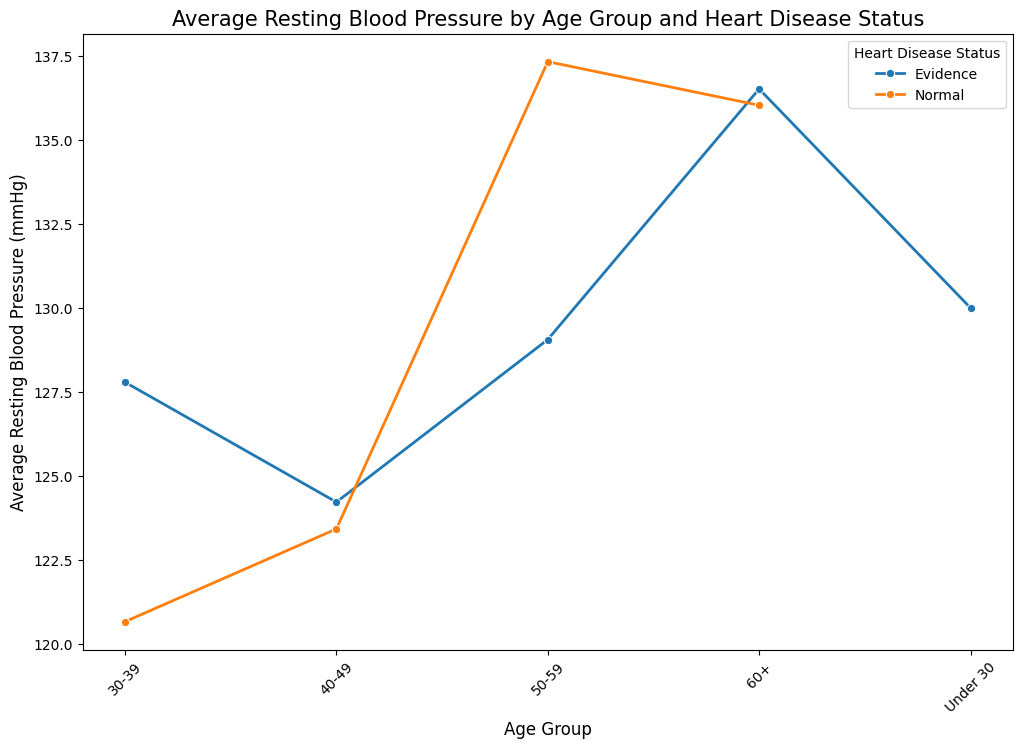

In [25]:
plt.figure(figsize=(12, 8))
sns.lineplot(
    x='Age Group',
    y='Avg Resting BP',
    hue='Heart Disease Status',
    data=df,
    palette='tab10',
    marker='o',       
    linewidth=2)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Resting Blood Pressure (mmHg)', fontsize=12)
plt.title('Average Resting Blood Pressure by Age Group and Heart Disease Status', fontsize=15)
plt.legend(title='Heart Disease Status')
plt.xticks(rotation=45)
plt.show()

# Impact of Serum Cholesterol on Heart Disease.

In [26]:
query = """SELECT
    CASE
        WHEN SerumCholesterol < 200 THEN 'Desirable (<200 mg/dl)'
        WHEN SerumCholesterol BETWEEN 200 AND 239 THEN 'Borderline High (200-239 mg/dl)'
        ELSE 'High (>=240 mg/dl)'
    END AS Cholesterol_Level,
    AVG(CASE WHEN HeartDiseaseStatus = 'Evidence' THEN 1 ELSE 0 END) * 100 AS HeartDisease_Percentage
FROM
    heart.`heart disease`
GROUP BY
    Cholesterol_Level"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Cholesterol Level","Heart Disease Percentage"])
df

,Cholesterol Level,Heart Disease Percentage
0,Borderline High (200-239 mg/dl),56.3422
1,Desirable (<200 mg/dl),58.5799
2,High (>=240 mg/dl),45.6480


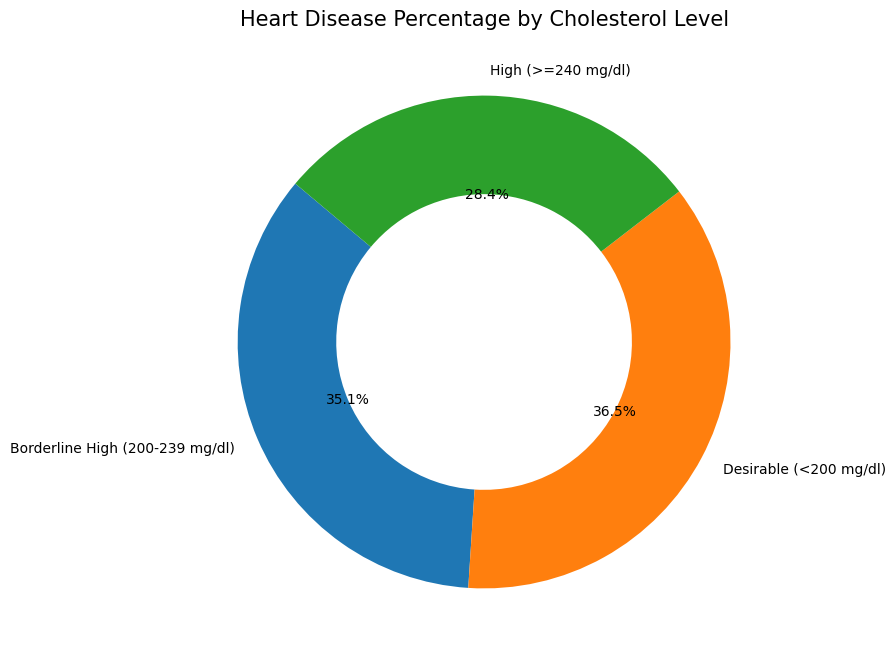

In [27]:
plt.figure(figsize=(8, 8))
plt.pie(
    df['Heart Disease Percentage'],
    labels=df['Cholesterol Level'],
    autopct='%1.1f%%',
    colors=plt.get_cmap('tab10').colors, 
    startangle=140, 
    wedgeprops=dict(width=0.4))
plt.title('Heart Disease Percentage by Cholesterol Level', fontsize=15)
plt.show()

# Conclusion:

In [28]:
# Successful heart disease diagnostic analysis reveals key risk factors using Python and SQL techniques.
# SQL queries efficiently extracted insights from heart disease data for effective pattern recognition.
# Python visualizations enhanced understanding of age, cholesterol, and blood pressure's role in heart disease.
# Advanced analytics helped identify correlations between chest pain types and heart disease occurrence.
# Project enabled data-driven recommendations for early diagnosis and preventive measures against heart disease.

# Presented By Kumar Siddharth.

# Thank You.